<a href="https://colab.research.google.com/github/irfanrois75-dotcom/Pengolahan-Citra-Digital/blob/main/tugas_Pertemuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

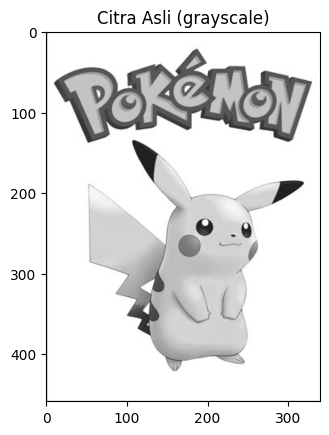

In [10]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
img = cv2.imread('IMG-20240311-WA0000.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (grayscale)')
plt.show()

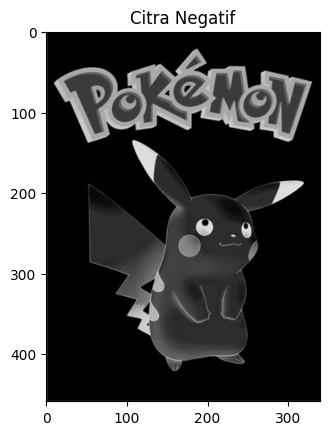

In [11]:
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title('Citra Negatif')
plt.show()

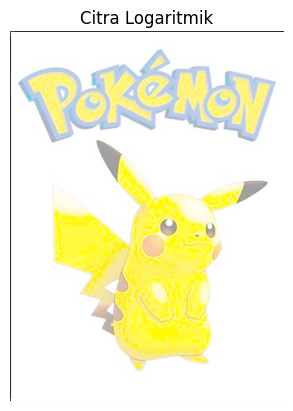

Citra logaritmik tersimpan sebagai citra_logaritmik.jpg


In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === 1. Membaca gambar ===
img = cv2.imread('IMG-20240311-WA0000.jpg')

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan. Periksa nama atau path file-nya.")

# === 2. Konversi ke float untuk operasi log (hindari overflow) ===
img_float = img.astype(np.float64)

# === 3. Rumus transformasi logaritmik ===
# Rumus: s = c * log(1 + r)
c = 255 / np.log(1 + np.max(img_float))
log_image = c * np.log1p(img_float)

# === 4. Normalisasi hasil ke 0–255 dan ubah ke uint8 ===
log_image = np.uint8(np.clip(log_image, 0, 255))

# === 5. Konversi dari BGR ke RGB agar warna tampil benar di matplotlib ===
log_rgb = cv2.cvtColor(log_image, cv2.COLOR_BGR2RGB)

# === 6. Tampilkan hanya citra logaritmik ===
plt.imshow(log_rgb)
plt.title('Citra Logaritmik')
plt.axis('off')
plt.show()

# === 7. (Opsional) Simpan hasil citra logaritmik ===
cv2.imwrite('citra_logaritmik.jpg', log_image)
print("Citra logaritmik tersimpan sebagai citra_logaritmik.jpg")


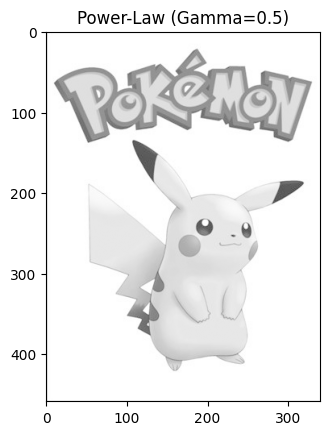

In [18]:
gamma = 0.5
c = 1
power_law = c * np.power(img / 255.0, gamma)
power_law = np.uint8(power_law * 255)

plt.imshow(power_law, cmap='gray')
plt.title(f'Power-Law (Gamma={gamma})')
plt.show()

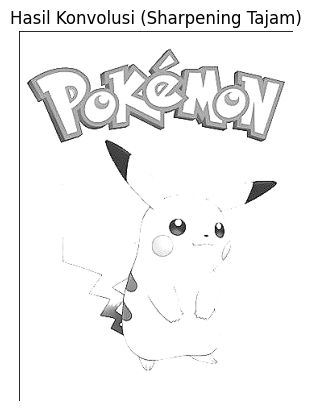

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
img = cv2.imread('IMG-20240311-WA0000.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Pastikan nama file dan ekstensi '.jpg' sesuai.")

# Kernel sharpening yang lebih kuat (kontras tinggi)
kernel = np.array([[0, -1, 0],
                   [-1, 6, -1],
                   [0, -1, 0]])

# Operasi konvolusi (filtering)
conv = cv2.filter2D(img, -1, kernel)

# Menampilkan hanya hasil konvolusi
plt.imshow(conv, cmap='gray')
plt.title('Hasil Konvolusi (Sharpening Tajam)')
plt.axis('off')
plt.show()
